Descomentar el index con ``ctrl+/``

<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='top1'></a>
# <center>75.06/95.58 Organización de Datos - TP 2

<div style="border-bottom:3px solid #000;">  -->

<!-- ## Index
  
<a href='#section1'>**Step 1:**</a>   Equipo    
<a href='#section2'>**Step 2:**</a>   Import de librerias  
<a href='#section3'>**Step 3:**</a>   Feature engineering  
<a href='#section4'>**Step 4:**</a>   NLP  
<a href='#section5'>**Step 5:**</a>   Modelos  
<a href='#section6'>**Step 6:**</a>   Scoring -->

<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section1'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 1: Equipo</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div> -->

# Oh La La... Data!

* **Hamma AALI CHTOUKI** --- *Padrón 106607 - Alumno regular de intercambio.*  
* **Aymeryc COUSAERT** ------  *Padrón 105464 - Alumno regular de intercambio.*
* **Mariana VINYOLAS**  ---------  *Alumna oyente.*

<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section2'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 2: Import de librerias </h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div> -->



In [61]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import catboost as catb


# from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section3'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 3: Feature engineering</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div> -->

In [4]:
# limpiamos la columna text eliminando algunos caracteres y la guardamos en 'text_clean'
df = train
df['text'] = df['text'].str.lower()


In [5]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1


In [6]:
# generamos una columna que indica con un 1 si el texto posee un link a un enlace externo
df['link'] = df['text'].apply(lambda x: x.count('http'))

In [7]:
df['contact'] = df['text'].apply(lambda x: x.count('@'))

In [8]:
df['hashtag'] = df['text'].apply(lambda x: x.count('#'))

In [9]:
df['keyword'] = df.keyword.str.replace('%20', '_')
df['keyword'] = df.keyword.str.lower()

In [10]:
df['length'] = df['text'].str.len()

In [11]:
def count_words(text):
    '''
    Funcion que toma un texto y devuelve la cantidad de palabras
    '''
    word_counts = len(text.split(' '))
    return word_counts

In [12]:
df['words'] = df['text'].apply(count_words)

In [13]:
def avg_word(texto):
    words = texto.split()
    return (sum(len(word) for word in words)/len(words))

In [14]:
df['average_word'] = df['text'].apply(lambda x: avg_word(x))

In [15]:
df['numerics'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [16]:
df.sample(5)

,id,keyword,location,text,target,link,contact,hashtag,length,words,average_word,numerics
4258,6050,heat_wave,"Crayford, London",@hollywarnexx mini heat wave apaz,1,0,1,0,33,5,5.800000,0
1777,2552,collision,btwn a rock and a hard place,sometimes in space celestial bodies with separ...,0,0,0,0,137,20,5.900000,0
1716,2476,collided,"Cape Cod, Massachusetts USA",'car vs motorcycle in harwich port' harwich po...,1,1,0,0,142,21,5.809524,0
3305,4736,evacuate,Sevier County.,so all the store's fire alarms went off today ...,1,0,0,0,123,23,4.391304,0
3037,4358,earthquake,"California, USA",usgs eq: m 0.6 - 8km ssw of anza california: t...,1,1,0,1,135,17,7.000000,0


<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section4'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 4: NLP</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div> -->

In [17]:
# eliminamos stopwords

stop = stopwords.words('english')

df['text_clean'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [18]:
# eliminamos signos de puntuacion y caracteres especiales
df['text_clean'] = df['text_clean'].str.replace('[^\w\s]','')

In [19]:
df['text_clean'] = df['text_clean'].apply(lambda x: word_tokenize(x))

In [20]:
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

In [21]:
# unificamos palabras que poseen la misma raiz aplicando la funcion word_lematizer
df['text_clean'] = df['text_clean'].apply(lambda x: word_lemmatizer(x))

In [22]:
# calculamos nuevamente la longuitud, pero ahora del texto limpio                               #########  ESTA MAL #########
df['length-clean'] = df['text_clean'].str.len()

In [23]:
df['words_clean'] = df['text_clean'].apply(len)

In [24]:
def avg_word(texto):
   
    return (sum(len(texto) for word in texto)/len(texto))

In [25]:
df['average_word_clean'] = df['text_clean'].apply(lambda x: avg_word(x))                       #########  ESTA MAL #########

In [26]:
df.sample(5)

,id,keyword,location,text,target,link,contact,hashtag,length,words,average_word,numerics,text_clean,length-clean,words_clean,average_word_clean
498,721,attacked,Peshawar,ik only troll his pol rivals never literally a...,0,0,0,0,130,22,4.954545,0,"[ik, troll, pol, rival, never, literally, abus...",13,13,13.0
579,837,bioterror,"Silver Spring, MD",.@aphl responds: fedex no longer to transport ...,1,1,1,0,115,16,6.250000,0,"[aphl, responds, fedex, longer, transport, bio...",12,12,12.0
2131,3059,deaths,AsunciÌ_n-PY / TÌ_bingen-GER,breast milk is the original #superfood but rat...,0,0,0,1,138,22,5.318182,1,"[breast, milk, original, superfood, rate, worl...",14,14,14.0
7252,10382,weapons,California,navy: no charges against officer for weapons v...,1,1,0,0,101,12,7.416667,0,"[navy, charge, officer, weapon, violation, cha...",8,8,8.0
6949,9971,tsunami,"Louavul, KY",#bbshelli seems pretty sure she's the one that...,0,0,0,2,69,12,4.833333,0,"[bbshelli, seems, pretty, sure, one, thats, go...",9,9,9.0


## Bag of Words

In [27]:
bow = CountVectorizer(max_features=1000, ngram_range=(1,1),analyzer = "word")

In [28]:
train_bow = bow.fit_transform(df['text'])                                                    #########  ESTA MAL #########

In [29]:
df_bow = pd.DataFrame(data = train_bow.todense(), columns = bow.get_feature_names())

## TF- IDF

In [30]:
tfidf = TfidfVectorizer(max_features=1500, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))


In [31]:
train_vect = tfidf.fit_transform(df['text'])                                                 #########  ESTA MAL #########

In [32]:
type(train_vect)

scipy.sparse.csr.csr_matrix

In [33]:
df_tf_idf = pd.DataFrame(data = train_vect.todense(), columns = tfidf.get_feature_names())

In [34]:
df_tf_idf.shape

(7613, 1500)

In [35]:
df_tf_idf['target'].value_counts()

0.000000    7604
0.641083       2
0.767244       1
0.418858       1
0.772605       1
0.340252       1
0.566981       1
0.520574       1
0.746818       1
Name: target, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 16 columns):
id                    7613 non-null int64
keyword               7552 non-null object
location              5080 non-null object
text                  7613 non-null object
target                7613 non-null int64
link                  7613 non-null int64
contact               7613 non-null int64
hashtag               7613 non-null int64
length                7613 non-null int64
words                 7613 non-null int64
average_word          7613 non-null float64
numerics              7613 non-null int64
text_clean            7613 non-null object
length-clean          7613 non-null int64
words_clean           7613 non-null int64
average_word_clean    7613 non-null float64
dtypes: float64(2), int64(10), object(4)
memory usage: 951.8+ KB


Para no perder tantos registros, vamos a dejar de lado por ahora las columnas ``keyword``, ``location`` y ``text``. Tambien eliminamos ``id`` porque no aporta informacion al analisis

In [37]:
df = df.drop(['id', 'keyword', 'location', 'text', 'text_clean'], axis=1)

In [38]:
df['target'].value_counts()  # chequeamos si los labels estan balanceados

0    4342
1    3271
Name: target, dtype: int64

In [39]:
# df_train = pd.concat([df, df_tf_idf], axis=1)  # revisar porque aparecen dos columnas llamadas target

In [40]:
# df_train.shape

<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section5'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 5: Modelos</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div> -->

In [42]:
# separamos el target del resto de los features

y = df.target    
X = df.drop('target', axis=1)

In [43]:
X.shape, y.shape

((7613, 10), (7613,))

In [44]:
# hacemos division entre train y test para cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)      

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5329, 10), (2284, 10), (5329,), (2284,))

In [46]:
# estandarizamos las features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test) 

In [47]:
# definimos una 
cv = StratifiedKFold(n_splits=5, random_state=27, shuffle=True)

## Random Forest

In [48]:
rf = RandomForestClassifier(max_depth= 4, random_state=27)
y_pred = rf.fit(X_train, y_train).predict(X_test)

In [49]:
rf.score(X_train, y_train), rf.score(X_test,y_test)

(0.6678551322949897, 0.659369527145359)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71      1304
           1       0.61      0.56      0.58       980

    accuracy                           0.66      2284
   macro avg       0.65      0.65      0.65      2284
weighted avg       0.66      0.66      0.66      2284



In [51]:
param_grid = {'n_estimators': [50, 100, 200], 
              'max_features': [2, 3, 4], 
              'max_depth': [5, 10, 20], 
              'min_samples_leaf':[10, 20]}


In [52]:
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=param_grid, cv=cv, verbose=1, n_jobs=-1, scoring='accuracy')

In [53]:
%%time
rf_grid_search.fit(X_train, y_train)  
display(rf_grid_search.best_estimator_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.6min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Wall time: 1min 39s


In [54]:
rf_grid_search.best_params_

{'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 10,
 'n_estimators': 200}

In [55]:
pred_grid = rf_grid_search.predict(X_test)

In [56]:
rf_grid_search.score(X_train, y_train), rf_grid_search.score(X_test,y_test)

(0.733345843497842, 0.6764448336252189)

In [57]:
print(classification_report(y_test, pred_grid))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73      1304
           1       0.64      0.58      0.60       980

    accuracy                           0.68      2284
   macro avg       0.67      0.66      0.67      2284
weighted avg       0.67      0.68      0.67      2284



## XGBoost

In [59]:
model_xgb = xgb.XGBClassifier(n_jobs=-1)

In [62]:
one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1

params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

In [63]:
xgb_cv = RandomizedSearchCV(model_xgb, params, n_iter=25, verbose=True)

In [65]:
%%time
xgb_cv.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   24.7s finished


Wall time: 25.1 s


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024264E77198>,
                                        'reg_a

In [66]:
y_predicted_xgb = xgb_cv.predict_proba(X_test)

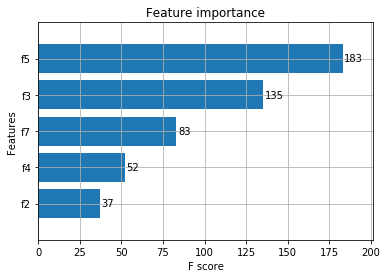

In [67]:
xgb.plot_importance(xgb_cv.best_estimator_, height=0.8, max_num_features=5);

## CatBoost

In [68]:
model_cat = catb.CatBoostClassifier()

In [69]:
model_cat.fit(X_train, y_train)

Learning rate set to 0.026901
0:	learn: 0.6899777	total: 161ms	remaining: 2m 41s
1:	learn: 0.6867776	total: 226ms	remaining: 1m 52s
2:	learn: 0.6837193	total: 294ms	remaining: 1m 37s
3:	learn: 0.6806678	total: 361ms	remaining: 1m 29s
4:	learn: 0.6776087	total: 440ms	remaining: 1m 27s
5:	learn: 0.6749487	total: 540ms	remaining: 1m 29s
6:	learn: 0.6724324	total: 617ms	remaining: 1m 27s
7:	learn: 0.6701674	total: 669ms	remaining: 1m 22s
8:	learn: 0.6680301	total: 732ms	remaining: 1m 20s
9:	learn: 0.6661244	total: 796ms	remaining: 1m 18s
10:	learn: 0.6639730	total: 861ms	remaining: 1m 17s
11:	learn: 0.6621680	total: 933ms	remaining: 1m 16s
12:	learn: 0.6599422	total: 995ms	remaining: 1m 15s
13:	learn: 0.6581530	total: 1.05s	remaining: 1m 13s
14:	learn: 0.6564553	total: 1.11s	remaining: 1m 13s
15:	learn: 0.6548863	total: 1.18s	remaining: 1m 12s
16:	learn: 0.6531614	total: 1.25s	remaining: 1m 12s
17:	learn: 0.6517186	total: 1.31s	remaining: 1m 11s
18:	learn: 0.6501429	total: 1.37s	remaining:

160:	learn: 0.6039950	total: 10.5s	remaining: 54.5s
161:	learn: 0.6039127	total: 10.5s	remaining: 54.5s
162:	learn: 0.6038294	total: 10.6s	remaining: 54.4s
163:	learn: 0.6037149	total: 10.6s	remaining: 54.2s
164:	learn: 0.6036528	total: 10.7s	remaining: 54.2s
165:	learn: 0.6034335	total: 10.8s	remaining: 54.1s
166:	learn: 0.6033650	total: 10.8s	remaining: 54.1s
167:	learn: 0.6032395	total: 10.9s	remaining: 54s
168:	learn: 0.6031602	total: 11s	remaining: 53.9s
169:	learn: 0.6031114	total: 11s	remaining: 53.8s
170:	learn: 0.6030961	total: 11.1s	remaining: 53.7s
171:	learn: 0.6029092	total: 11.1s	remaining: 53.6s
172:	learn: 0.6029078	total: 11.1s	remaining: 53.3s
173:	learn: 0.6028389	total: 11.2s	remaining: 53.3s
174:	learn: 0.6028152	total: 11.3s	remaining: 53.2s
175:	learn: 0.6026709	total: 11.4s	remaining: 53.2s
176:	learn: 0.6026434	total: 11.4s	remaining: 53s
177:	learn: 0.6026075	total: 11.4s	remaining: 52.8s
178:	learn: 0.6025349	total: 11.5s	remaining: 52.7s
179:	learn: 0.602479

322:	learn: 0.5934406	total: 20.8s	remaining: 43.6s
323:	learn: 0.5933978	total: 20.9s	remaining: 43.5s
324:	learn: 0.5933498	total: 20.9s	remaining: 43.4s
325:	learn: 0.5933493	total: 21s	remaining: 43.3s
326:	learn: 0.5933453	total: 21s	remaining: 43.3s
327:	learn: 0.5932946	total: 21.1s	remaining: 43.2s
328:	learn: 0.5932851	total: 21.2s	remaining: 43.1s
329:	learn: 0.5932106	total: 21.2s	remaining: 43.1s
330:	learn: 0.5929849	total: 21.3s	remaining: 43.1s
331:	learn: 0.5929691	total: 21.4s	remaining: 43s
332:	learn: 0.5929533	total: 21.4s	remaining: 42.9s
333:	learn: 0.5929481	total: 21.5s	remaining: 42.8s
334:	learn: 0.5929200	total: 21.5s	remaining: 42.7s
335:	learn: 0.5928842	total: 21.6s	remaining: 42.7s
336:	learn: 0.5928365	total: 21.6s	remaining: 42.6s
337:	learn: 0.5928195	total: 21.7s	remaining: 42.5s
338:	learn: 0.5927431	total: 21.8s	remaining: 42.5s
339:	learn: 0.5926666	total: 21.8s	remaining: 42.4s
340:	learn: 0.5926352	total: 21.9s	remaining: 42.3s
341:	learn: 0.5926

483:	learn: 0.5843673	total: 30.9s	remaining: 33s
484:	learn: 0.5843019	total: 31s	remaining: 32.9s
485:	learn: 0.5842739	total: 31.1s	remaining: 32.9s
486:	learn: 0.5842329	total: 31.2s	remaining: 32.8s
487:	learn: 0.5840998	total: 31.2s	remaining: 32.8s
488:	learn: 0.5840870	total: 31.3s	remaining: 32.7s
489:	learn: 0.5839826	total: 31.4s	remaining: 32.6s
490:	learn: 0.5839130	total: 31.4s	remaining: 32.6s
491:	learn: 0.5838777	total: 31.5s	remaining: 32.5s
492:	learn: 0.5837215	total: 31.6s	remaining: 32.5s
493:	learn: 0.5836868	total: 31.6s	remaining: 32.4s
494:	learn: 0.5836564	total: 31.7s	remaining: 32.3s
495:	learn: 0.5836444	total: 31.8s	remaining: 32.3s
496:	learn: 0.5836195	total: 31.9s	remaining: 32.3s
497:	learn: 0.5835894	total: 31.9s	remaining: 32.2s
498:	learn: 0.5835776	total: 32s	remaining: 32.1s
499:	learn: 0.5834631	total: 32.1s	remaining: 32.1s
500:	learn: 0.5834210	total: 32.1s	remaining: 32s
501:	learn: 0.5833475	total: 32.2s	remaining: 31.9s
502:	learn: 0.583343

643:	learn: 0.5767176	total: 41.1s	remaining: 22.7s
644:	learn: 0.5767120	total: 41.2s	remaining: 22.7s
645:	learn: 0.5766457	total: 41.3s	remaining: 22.6s
646:	learn: 0.5765754	total: 41.3s	remaining: 22.5s
647:	learn: 0.5764350	total: 41.4s	remaining: 22.5s
648:	learn: 0.5764023	total: 41.4s	remaining: 22.4s
649:	learn: 0.5763139	total: 41.5s	remaining: 22.3s
650:	learn: 0.5762077	total: 41.6s	remaining: 22.3s
651:	learn: 0.5761695	total: 41.6s	remaining: 22.2s
652:	learn: 0.5761256	total: 41.7s	remaining: 22.2s
653:	learn: 0.5761041	total: 41.8s	remaining: 22.1s
654:	learn: 0.5760437	total: 41.8s	remaining: 22s
655:	learn: 0.5760358	total: 41.9s	remaining: 22s
656:	learn: 0.5760096	total: 42s	remaining: 21.9s
657:	learn: 0.5759389	total: 42s	remaining: 21.8s
658:	learn: 0.5759350	total: 42.1s	remaining: 21.8s
659:	learn: 0.5758270	total: 42.2s	remaining: 21.7s
660:	learn: 0.5758016	total: 42.2s	remaining: 21.7s
661:	learn: 0.5757685	total: 42.3s	remaining: 21.6s
662:	learn: 0.575744

805:	learn: 0.5710106	total: 51.5s	remaining: 12.4s
806:	learn: 0.5709748	total: 51.5s	remaining: 12.3s
807:	learn: 0.5709285	total: 51.6s	remaining: 12.3s
808:	learn: 0.5709256	total: 51.7s	remaining: 12.2s
809:	learn: 0.5708306	total: 51.7s	remaining: 12.1s
810:	learn: 0.5708220	total: 51.8s	remaining: 12.1s
811:	learn: 0.5708119	total: 51.9s	remaining: 12s
812:	learn: 0.5708088	total: 51.9s	remaining: 11.9s
813:	learn: 0.5707940	total: 52s	remaining: 11.9s
814:	learn: 0.5707450	total: 52.1s	remaining: 11.8s
815:	learn: 0.5706932	total: 52.2s	remaining: 11.8s
816:	learn: 0.5706592	total: 52.3s	remaining: 11.7s
817:	learn: 0.5706027	total: 52.3s	remaining: 11.6s
818:	learn: 0.5705729	total: 52.4s	remaining: 11.6s
819:	learn: 0.5705720	total: 52.5s	remaining: 11.5s
820:	learn: 0.5705686	total: 52.5s	remaining: 11.5s
821:	learn: 0.5705585	total: 52.6s	remaining: 11.4s
822:	learn: 0.5705510	total: 52.7s	remaining: 11.3s
823:	learn: 0.5705449	total: 52.7s	remaining: 11.3s
824:	learn: 0.57

967:	learn: 0.5678225	total: 1m 1s	remaining: 2.04s
968:	learn: 0.5678209	total: 1m 1s	remaining: 1.98s
969:	learn: 0.5678073	total: 1m 1s	remaining: 1.92s
970:	learn: 0.5677926	total: 1m 2s	remaining: 1.85s
971:	learn: 0.5677888	total: 1m 2s	remaining: 1.79s
972:	learn: 0.5677694	total: 1m 2s	remaining: 1.73s
973:	learn: 0.5677673	total: 1m 2s	remaining: 1.66s
974:	learn: 0.5677673	total: 1m 2s	remaining: 1.6s
975:	learn: 0.5677405	total: 1m 2s	remaining: 1.53s
976:	learn: 0.5677180	total: 1m 2s	remaining: 1.47s
977:	learn: 0.5676746	total: 1m 2s	remaining: 1.41s
978:	learn: 0.5676558	total: 1m 2s	remaining: 1.34s
979:	learn: 0.5676541	total: 1m 2s	remaining: 1.28s
980:	learn: 0.5676463	total: 1m 2s	remaining: 1.21s
981:	learn: 0.5676450	total: 1m 2s	remaining: 1.15s
982:	learn: 0.5676312	total: 1m 2s	remaining: 1.09s
983:	learn: 0.5676231	total: 1m 2s	remaining: 1.02s
984:	learn: 0.5676209	total: 1m 2s	remaining: 958ms
985:	learn: 0.5676133	total: 1m 2s	remaining: 894ms
986:	learn: 0

In [70]:
y_predicted_cat = model_cat.predict_proba(X_test)

<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section6'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 6: Scoring</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div> -->

In [71]:
plot_roc(y_test, y_predicted_xgb, plot_micro=False, plot_macro=False);

NameError: name 'plot_roc' is not defined

In [72]:
xgb_auc = roc_auc_score(y_test, y_predicted_xgb[:,1])
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.7149962438963315


In [73]:
cat_auc = roc_auc_score(y_test,y_predicted_cat[:,1])
print("El valor del AUC es: ", cat_auc)

El valor del AUC es:  0.7164043915112057
